/var/folders/gz/s5v3m8gd3bs1d5lw981p8v9r0000gn/T/ipykernel_27948/3006148980.py:119: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


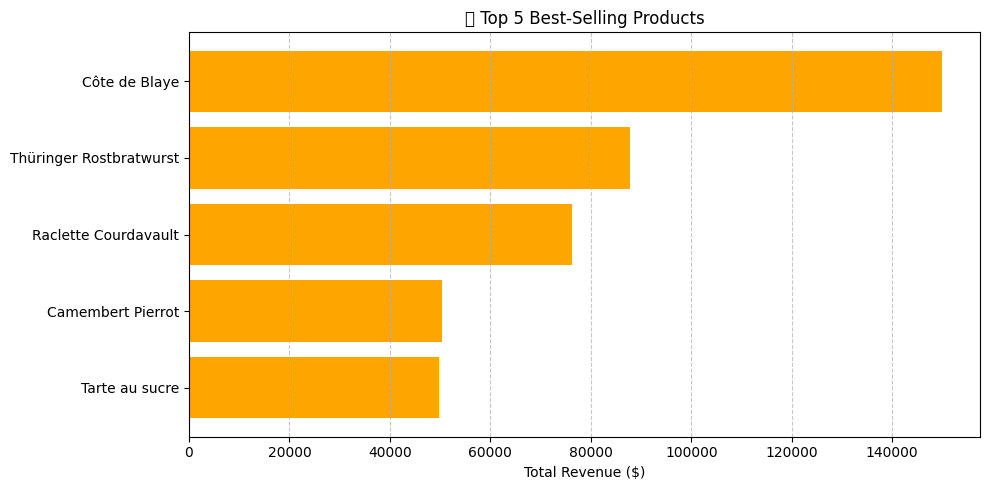

/var/folders/gz/s5v3m8gd3bs1d5lw981p8v9r0000gn/T/ipykernel_27948/3006148980.py:130: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


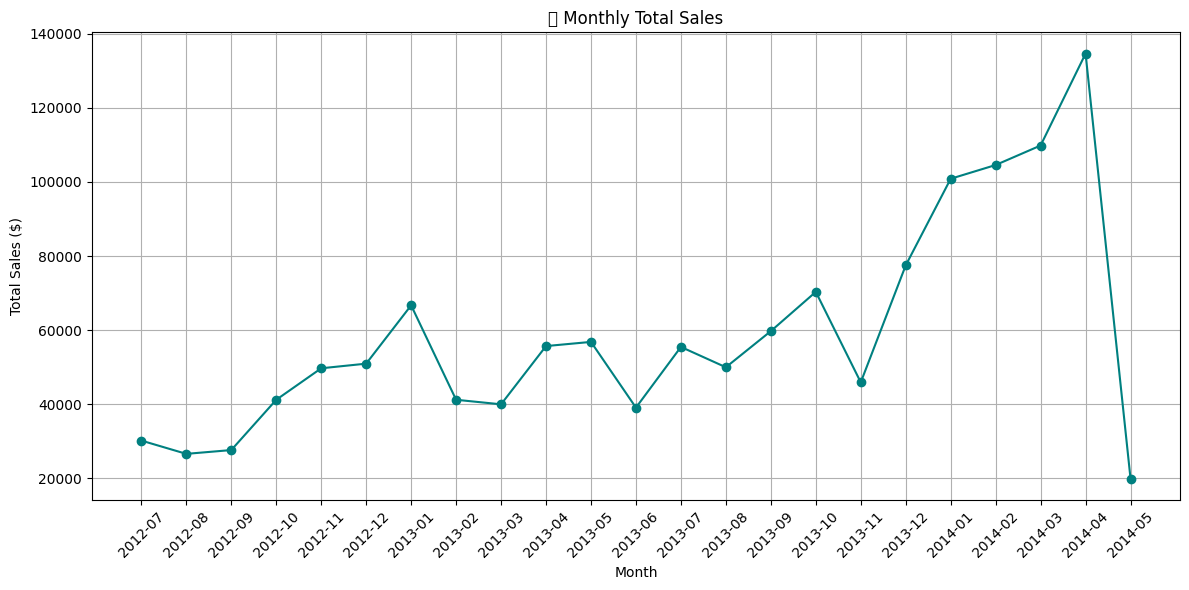

/var/folders/gz/s5v3m8gd3bs1d5lw981p8v9r0000gn/T/ipykernel_27948/3006148980.py:141: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


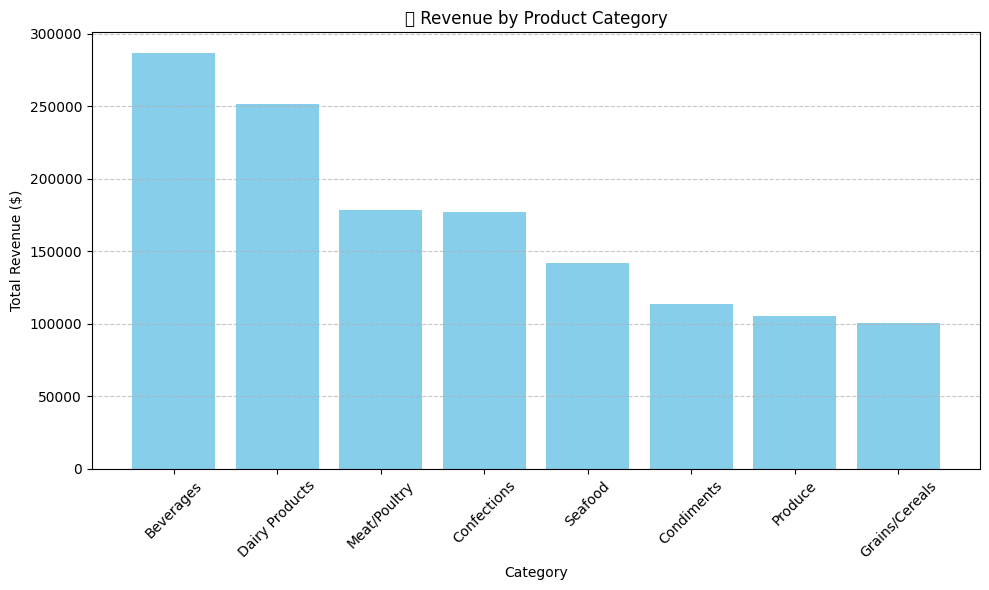

/var/folders/gz/s5v3m8gd3bs1d5lw981p8v9r0000gn/T/ipykernel_27948/3006148980.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


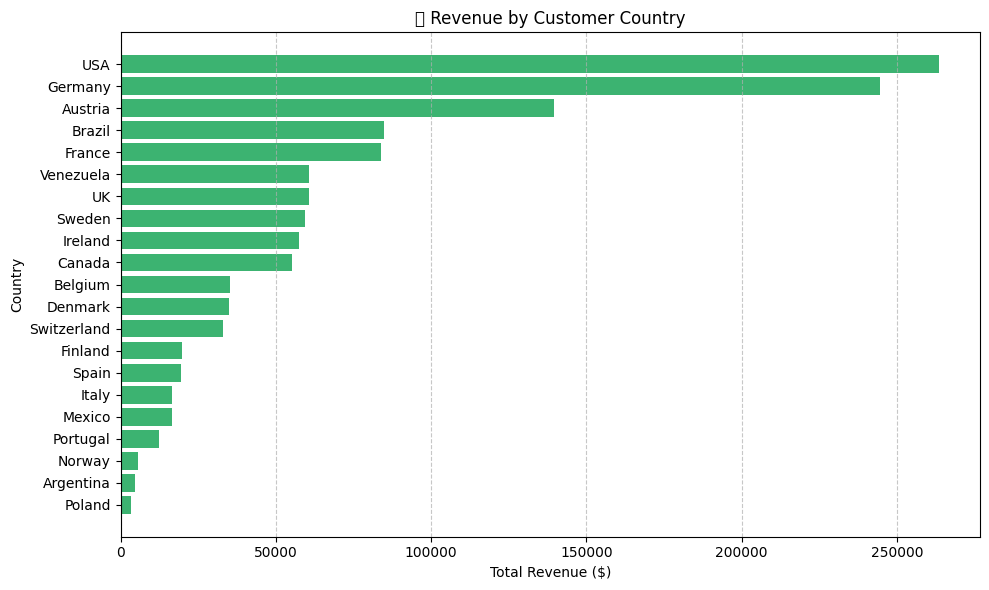

/var/folders/gz/s5v3m8gd3bs1d5lw981p8v9r0000gn/T/ipykernel_27948/3006148980.py:167: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/chaitanyamukthineni/Downloads/sales-dashboard/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


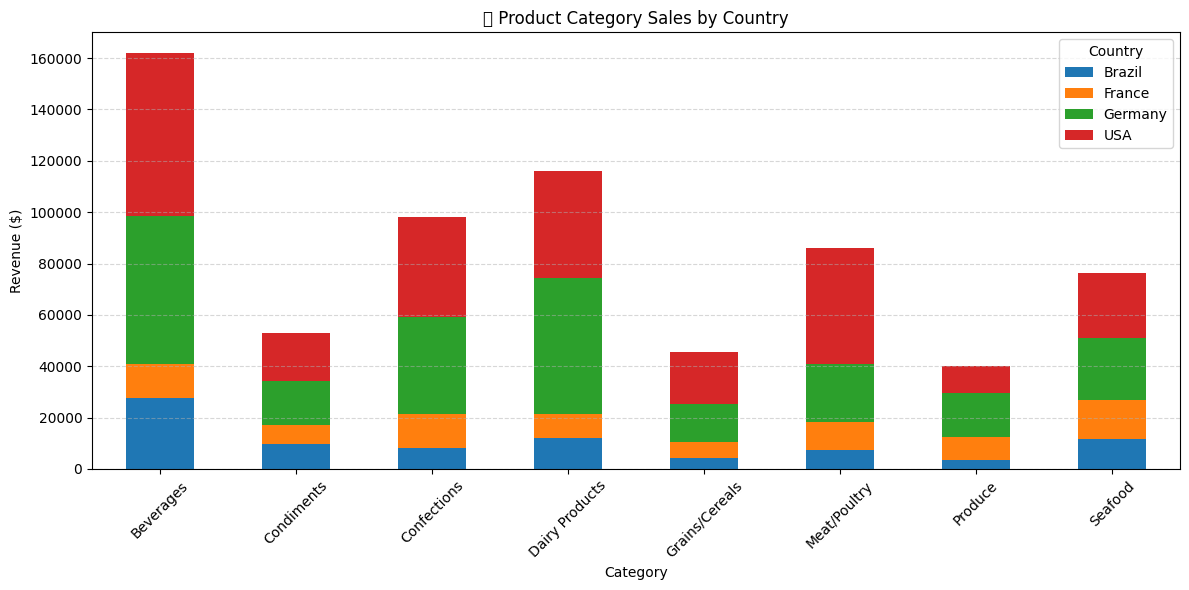

<Figure size 640x480 with 0 Axes>

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Connect to DB
db_path = os.path.abspath("../data/Northwind_small.sqlite")
conn = sqlite3.connect(db_path)

# Query: Monthly Sales (Total = UnitPrice * Quantity)
query = """
SELECT 
    strftime('%Y-%m', OrderDate) AS Month,
    SUM(UnitPrice * Quantity) AS TotalSales
FROM 
    [OrderDetail] od
JOIN 
    [Order] o ON o.Id = od.OrderId
GROUP BY 
    Month
ORDER BY 
    Month;
"""

#Top 5 Best-Selling Products
query_top_products = """
SELECT 
    p.ProductName,
    SUM(od.UnitPrice * od.Quantity) AS TotalRevenue
FROM 
    OrderDetail od
JOIN 
    Product p ON od.ProductId = p.Id
GROUP BY 
    p.ProductName
ORDER BY 
    TotalRevenue DESC
LIMIT 5;
"""

top_products_df = pd.read_sql_query(query_top_products, conn)
top_products_df

#Revenue by Product Category
query_category_sales = """
SELECT 
    c.CategoryName,
    SUM(od.UnitPrice * od.Quantity) AS TotalRevenue
FROM 
    OrderDetail od
JOIN 
    Product p ON od.ProductId = p.Id
JOIN 
    Category c ON p.CategoryId = c.Id
GROUP BY 
    c.CategoryName
ORDER BY 
    TotalRevenue DESC;
"""

category_sales_df = pd.read_sql_query(query_category_sales, conn)
category_sales_df

# Revenue by Customer Region
query_country_sales = """
SELECT 
    cu.Country,
    SUM(od.UnitPrice * od.Quantity) AS TotalRevenue
FROM 
    OrderDetail od
JOIN 
    [Order] o ON od.OrderId = o.Id
JOIN 
    Customer cu ON o.CustomerId = cu.Id
GROUP BY 
    cu.Country
ORDER BY 
    TotalRevenue DESC;
"""

country_sales_df = pd.read_sql_query(query_country_sales, conn)
country_sales_df

# Top Product Categories per Country
query_country_category_sales = """
SELECT 
    cu.Country,
    c.CategoryName,
    SUM(od.UnitPrice * od.Quantity) AS TotalRevenue
FROM 
    OrderDetail od
JOIN 
    [Order] o ON od.OrderId = o.Id
JOIN 
    Customer cu ON o.CustomerId = cu.Id
JOIN 
    Product p ON od.ProductId = p.Id
JOIN 
    Category c ON p.CategoryId = c.Id
GROUP BY 
    cu.Country, c.CategoryName
ORDER BY 
    cu.Country, TotalRevenue DESC;
"""

country_cat_df = pd.read_sql_query(query_country_category_sales, conn)
country_cat_df


df = pd.read_sql_query(query, conn)

#Plot it - Horizontal Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(top_products_df['ProductName'], top_products_df['TotalRevenue'], color='orange')
plt.xlabel('Total Revenue ($)')
plt.title('🔥 Top 5 Best-Selling Products')
plt.gca().invert_yaxis()  # Show the highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['TotalSales'], marker='o', color='teal')
plt.title('📈 Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot it - Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(category_sales_df['CategoryName'], category_sales_df['TotalRevenue'], color='skyblue')
plt.title('📦 Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Plot it - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(country_sales_df['Country'], country_sales_df['TotalRevenue'], color='mediumseagreen')
plt.title('🌍 Revenue by Customer Country')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Stacked Bar Chart( for selected countries)
selected_countries = ['USA', 'Germany', 'France', 'Brazil']
filtered = country_cat_df[country_cat_df['Country'].isin(selected_countries)]

pivoted = filtered.pivot(index='CategoryName', columns='Country', values='TotalRevenue')
pivoted.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('📦 Product Category Sales by Country')
plt.ylabel('Revenue ($)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Save DataFrame to CSV
country_sales_df.to_csv("../outputs/reports/country_sales.csv", index=False)

# Save chart to PNG
plt.savefig("../outputs/charts/country_sales.png")


